In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

le = LabelEncoder()

books = pd.read_json('books.json')
books = books.drop(columns=['title', 'synopsis', 'name', 'Column1'])

books['genre'] = le.fit_transform(books['genre'])



iris = pd.read_json('iris.json')
iris['species'] = le.fit_transform(iris['species'])
iris, books

(     sepalLength  sepalWidth  petalLength  petalWidth  species
 0            5.1         3.5          1.4         0.2        0
 1            4.9         3.0          1.4         0.2        0
 2            4.7         3.2          1.3         0.2        0
 3            4.6         3.1          1.5         0.2        0
 4            5.0         3.6          1.4         0.2        0
 ..           ...         ...          ...         ...      ...
 145          6.7         3.0          5.2         2.3        2
 146          6.3         2.5          5.0         1.9        2
 147          6.5         3.0          5.2         2.0        2
 148          6.2         3.4          5.4         2.3        2
 149          5.9         3.0          5.1         1.8        2
 
 [150 rows x 5 columns],
       rating  num_ratings  num_reviews  num_followers  genre
 0       4.39       806229        46149          30500      1
 1       4.04       367056        12879           6538      1
 2       4.07      

In [21]:
X = iris[['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']]
y = iris['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm = SVC()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(classification_report(y_test, y_pred))


0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.88      0.88      0.88         8
           2       0.94      0.94      0.94        16

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



In [22]:
X = books[["rating",  "num_ratings",  "num_reviews",  "num_followers"]]
y = books['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm = SVC()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(classification_report(y_test, y_pred))


0.461038961038961
              precision    recall  f1-score   support

           0       0.52      0.51      0.52        74
           1       0.00      0.00      0.00        15
           2       0.83      0.42      0.56        24
           3       0.00      0.00      0.00        14
           4       0.62      0.17      0.27        29
           5       0.00      0.00      0.00        20
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00        15
           8       0.41      0.94      0.57        95
           9       0.00      0.00      0.00        15

    accuracy                           0.46       308
   macro avg       0.24      0.20      0.19       308
weighted avg       0.38      0.46      0.37       308



/home/m/dev/ai/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/m/dev/ai/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/m/dev/ai/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Standard Scaler
The standard scaler removes the mean and scales the values to unit variance
This means that the values will be centered around 0
This is good for the SVM algorithm because values will be more siginficant
I'm using it above becuse the resources online said I should

# PCA
PCA makes a large dataset simpler by for example changing a 2d dataset to a 1d.

For example it can in an x,y grid make a regression and then measure the length from the created line to all the points
Then the 2d x,y have been converted to a 1d number which measures the length from the line.

It doesn't seem to be too useful on any of these datasets though, perhabs because there is too little correlation

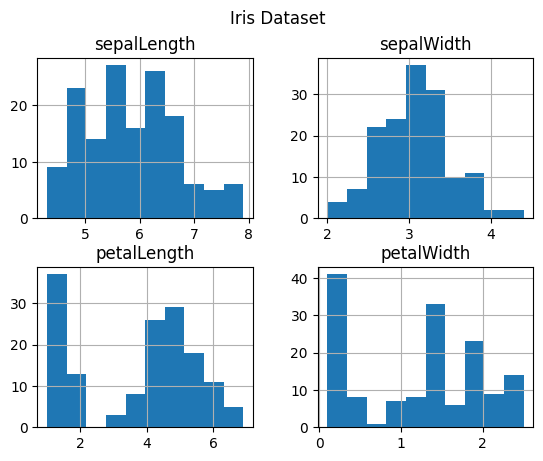

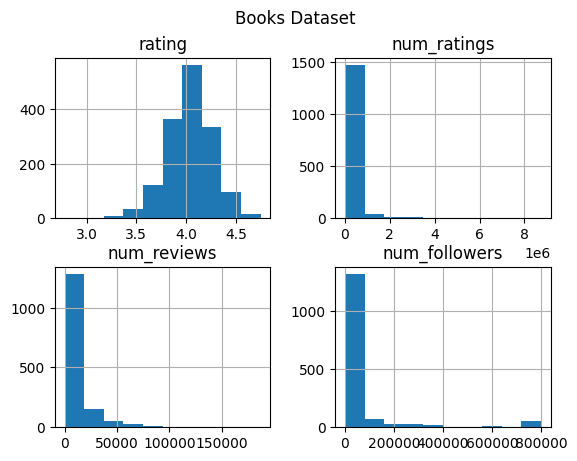

NameError: name 'pca' is not defined

In [23]:
import matplotlib.pyplot as plt

iris.hist(column=['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth'], bins=10)
plt.suptitle('Iris Dataset')
plt.show()

books.hist(column=['rating', 'num_ratings', 'num_reviews', 'num_followers'], bins=10)
plt.suptitle('Books Dataset')
plt.show()

X_train_pca = pca.transform(X_train)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot')
plt.show()

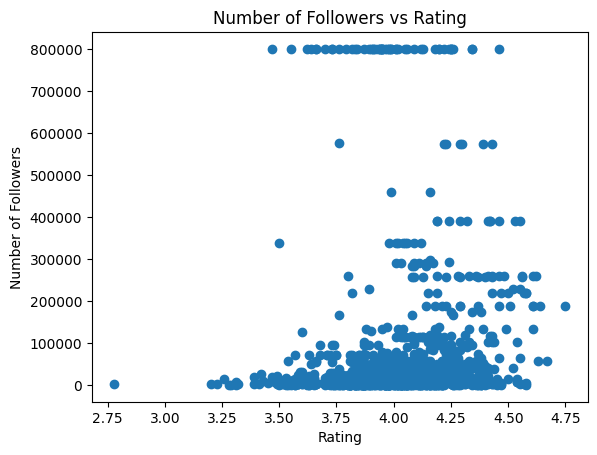

In [186]:
plt.scatter(books['rating'], books['num_followers']) # There seems to be a very small correlation between rating and number of followers
plt.xlabel('Rating')
plt.ylabel('Number of Followers')
plt.title('Number of Followers vs Rating')
plt.show()

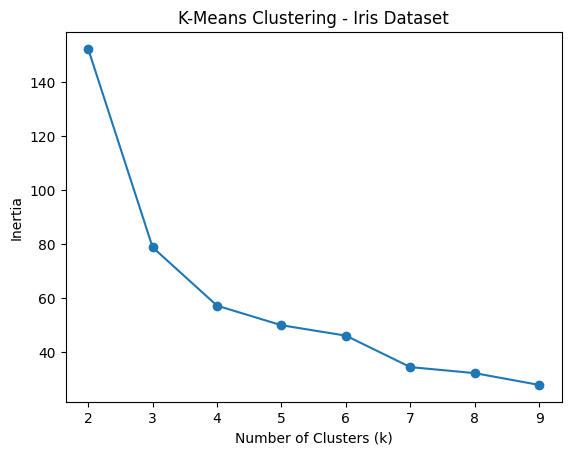

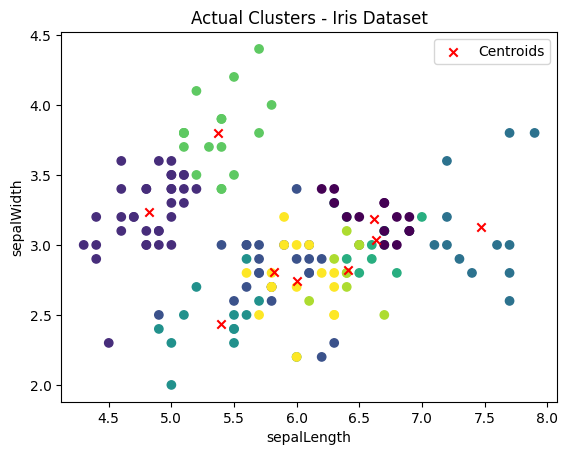

In [187]:
iris = pd.read_json('iris.json')

X_iris = iris[['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']]
k_values = range(2, 10)
inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_iris)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('K-Means Clustering - Iris Dataset')
plt.show()

kmeans_optimal = KMeans(n_clusters=k)
kmeans_optimal.fit(X_iris)

labels = kmeans_optimal.labels_

plt.scatter(X_iris['sepalLength'], X_iris['sepalWidth'], c=labels, cmap='viridis')
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1], marker='x', color='red', label='Centroids')
plt.xlabel('sepalLength')
plt.ylabel('sepalWidth')
plt.title('Actual Clusters - Iris Dataset')
plt.legend()
plt.show()

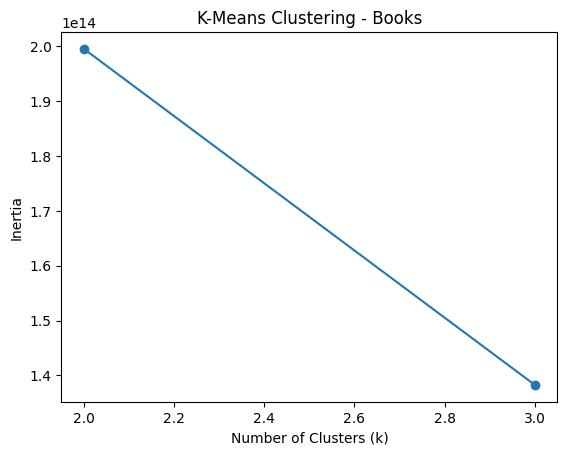

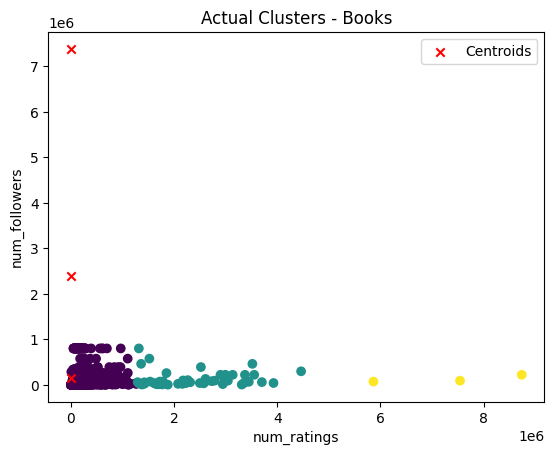

In [188]:
iris = pd.read_json('books.json')

X_iris = iris[['rating', 'num_ratings', 'num_reviews', 'num_followers']]
k_values = range(2, 4)
inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_iris)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('K-Means Clustering - Books')
plt.show()

kmeans_optimal = KMeans(n_clusters=k)
kmeans_optimal.fit(X_iris)

labels = kmeans_optimal.labels_

plt.scatter(X_iris['num_ratings'], X_iris['num_followers'], c=labels, cmap='viridis')
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1], marker='x', color='red', label='Centroids')
plt.xlabel('num_ratings')
plt.ylabel('num_followers')
plt.title('Actual Clusters - Books')
plt.legend()
plt.show()


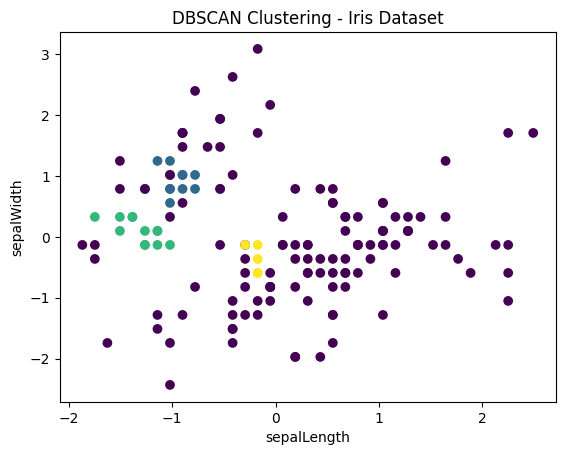

In [189]:


iris = pd.read_json('iris.json')
X_iris = iris[['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_iris)

dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X_scaled)

labels = dbscan.labels_
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.xlabel('sepalLength')
plt.ylabel('sepalWidth')
plt.title('DBSCAN Clustering - Iris Dataset')
plt.show()


[-1  0  0 ... -1 -1  0]


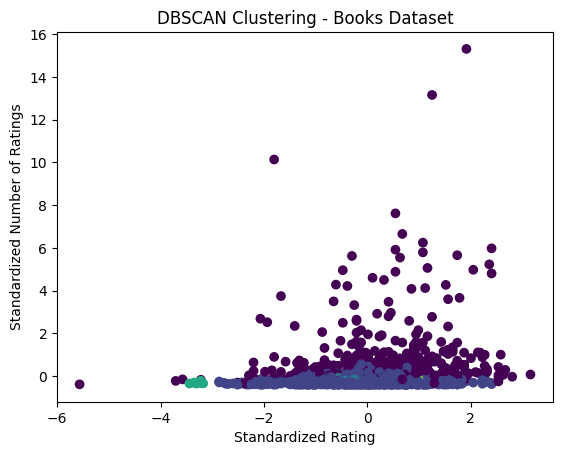

In [13]:
books = pd.read_json('books.json')

X = books[['rating', 'num_ratings', 'num_reviews', 'num_followers']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X_scaled)

labels = dbscan.labels_

print(labels)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.xlabel('Standardized Rating')
plt.ylabel('Standardized Number of Ratings')
plt.title('DBSCAN Clustering - Books Dataset')
plt.show()

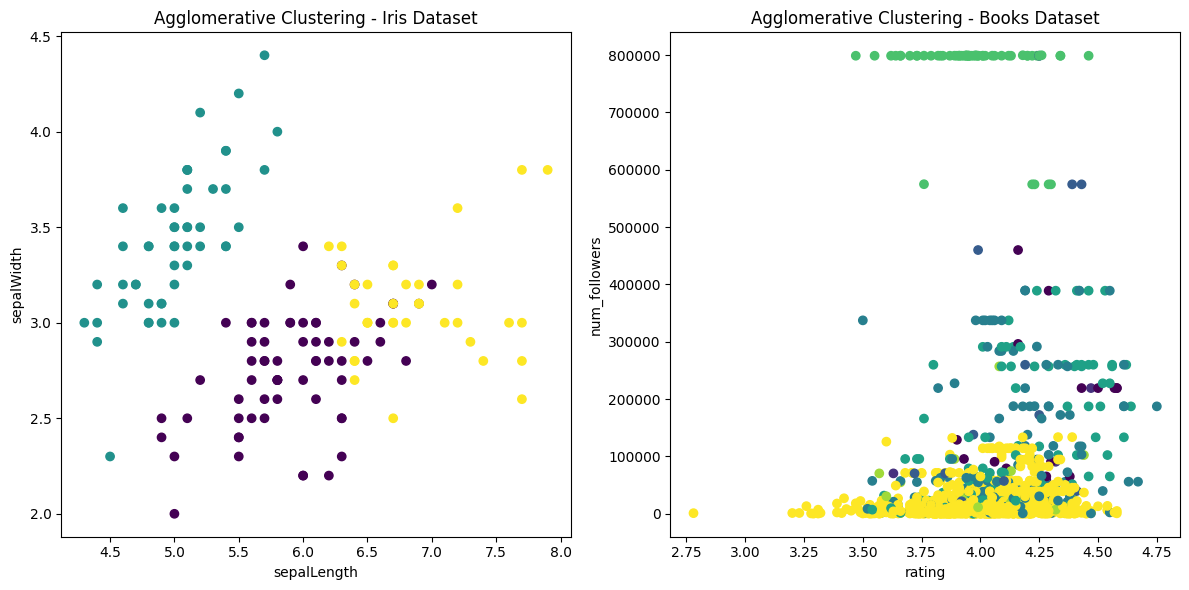

In [26]:
iris = pd.read_json('iris.json')
books = pd.read_json('books.json')


k_iris = 3
k_books = 8
X_iris = iris[['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']]
agglomerative_iris = AgglomerativeClustering(n_clusters=k_iris)
labels_iris = agglomerative_iris.fit_predict(X_iris)

X_books = books[['rating', 'num_ratings', 'num_reviews', 'num_followers']]
agglomerative_books = AgglomerativeClustering(n_clusters=k_books)
labels_books = agglomerative_books.fit_predict(X_books)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_iris['sepalLength'], X_iris['sepalWidth'], c=labels_iris, cmap='viridis')
plt.xlabel('sepalLength')
plt.ylabel('sepalWidth')
plt.title('Agglomerative Clustering - Iris Dataset')
plt.subplot(1, 2, 2)
plt.scatter(X_books['rating'], X_books['num_followers'], c=labels_books, cmap='viridis')
plt.xlabel('rating')
plt.ylabel('num_followers')
plt.title('Agglomerative Clustering - Books Dataset')

plt.tight_layout()
plt.show()

# I am satisfied with the iris clustering, but not with the books.

# Are the datasets suited for unsupervised learning?

It seems like the iris dataset was the best for unsupervised learning even though it performed worse than with the SVM counterapart.
However there are drawbacks to with supervised learning for example the data needs to be labeled which often has to be done by a human which I beleive is bad in almost every way

https://www.youtube.com/watch?v=VPSZFUiElls

There can also be good usecases for example with chatgpt where they use supervised learning in some ways by for example putting thumbs up or down on a prompt or making multiple answers and letting the user select the best

The books dataset was much worse with unsupervied learning and there doesn't seem to be much pattern at all. The clustering that happend was mostly in clusters of num_followers and no correlation between the rating and the followers.

# Tracksdata for unsupervied learning
I think the tracksdata dataset would be good for unsupervied learning like the iris dataset.

This is because just like flowers songs from different genres often have the same length and poularity ( at least for smaller genres where the listener groups are smaller )    

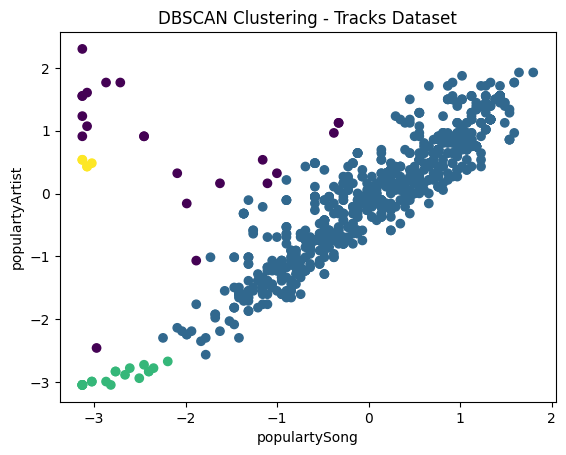

In [30]:
tracksdata = pd.read_csv('TracksDetail.csv')

X_track = tracksdata[['populartySong', 'populartyArtist']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_track)

dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X_scaled)

labels = dbscan.labels_
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.xlabel('populartySong')
plt.ylabel('populartyArtist')
plt.title('DBSCAN Clustering - Tracks Dataset')
plt.show()

